# Data source and description
### Contains HM Land Registry data © Crown copyright and database right 2021. This data is licensed under the Open Government Licence v3.0.

Column names derived from data items with descriptions where appropriate source: https://www.gov.uk/guidance/about-the-price-paid-data 
<br>

|Column Names|Data Item|Descriptions
|---|---|---|
|id|Transaction unique identifier|a reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.|
|price| Price |Sale price stated on the transfer deed.|
|postcode| Postcode | This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated and these changes are not reflected in the Price Paid Dataset.|
|type| Property type| D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other. <br>Note that:  We only record the above categories to describe property type, we do not separately identify bungalows. End-of-terrace properties are included in the Terraced category above. ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values, for example where a property comprises more than one large parcel of land.|
|new_build| Old/New| Indicates the age of the property and applies to all price paid transactions, residential and non-residential. <br>Y = a newly built property, N = an established residential building|
|duration | Duration | Relates to the tenure: F = Freehold, L= Leasehold etc. <br> Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.|
|primary_address|PAON|Primary Addressable Object Name. Typically the house number or name.|
|secondary_address|SAON|Secondary Addressable Object Name. Where a property has been divided into separate units (for example, flats), the PAON (above) will identify the building and a SAON will be specified that identifies the separate unit/flat.|
|street|Street||
|locality|Locality||
|town_city|Town/City||
|district|District||
|county|County||
|ppd_category|PPD Category Type|Indicates the type of Price Paid transaction. <br> A = Standard Price Paid entry, includes single residential property sold for value. <br> B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage), transfers to non-private individuals and sales where the property type is classed as ‘Other’. <br> Note that category B does not separately identify the transaction types stated. HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.|
|record|Record Status (monthly files only)| Indicates additions, changes and deletions to the records.(see guide below). <br>A = Addition <br>C = Change <br>D = Delete <br>Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.

## Hypothesis
From the initial literatures reviewed, it is reasonable to make the following conjectures:
* The first lockdown impacted investor’s confidence therefore property sales decreased or remained the same prior to the pandemic.
* The subsequent lockdowns, property sales trend start to increase.
* Average price of the homes sold increased during lockdown.
* House sales increased in towns and decreased outside of cities as a result of remote working.
* An increase in property sales inline with Chancellor Rishi Sunak’s announcements on SDLT holiday.


# 1. Exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import seaborn as sns
import plotly.express as px
import datetime as dt
from datetime import datetime
from matplotlib.ticker import ScalarFormatter

In [2]:
# Display maximum dataframe
pd.set_option('display.max_rows', None)

In [3]:
%%time

# Read .csv file back in for analysis
data = pd.read_csv('pp_decade_clean.csv', index_col=False)

CPU times: user 22 s, sys: 7.9 s, total: 29.9 s
Wall time: 31.8 s


In [4]:
%%time
england = pd.read_csv('pp_england.csv', index_col=False)

CPU times: user 21.1 s, sys: 8.37 s, total: 29.5 s
Wall time: 32.7 s


In [5]:
%%time
wales = pd.read_csv('pp_wales.csv', index_col=False)

CPU times: user 964 ms, sys: 226 ms, total: 1.19 s
Wall time: 1.36 s


In [6]:
# Work on a copy of the pp_decade_clean data
df = data.copy(deep=True)

### 1.1 Preparing the dataframes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9661539 entries, 0 to 9661538
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   price            int64 
 2   date             object
 3   postcode         object
 4   type             object
 5   new_build        object
 6   duration         object
 7   primary_address  object
 8   street           object
 9   town_city        object
 10  district         object
 11  county           object
 12  ppd_category     object
 13  record           object
 14  year             int64 
 15  month            int64 
dtypes: int64(3), object(13)
memory usage: 1.2+ GB


In [8]:
england.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9176891 entries, 0 to 9176890
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   price            int64 
 2   date             object
 3   postcode         object
 4   type             object
 5   new_build        object
 6   duration         object
 7   primary_address  object
 8   street           object
 9   town_city        object
 10  district         object
 11  county           object
 12  ppd_category     object
 13  record           object
 14  year             int64 
 15  month            int64 
dtypes: int64(3), object(13)
memory usage: 1.1+ GB


In [9]:
wales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484648 entries, 0 to 484647
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               484648 non-null  object
 1   price            484648 non-null  int64 
 2   date             484648 non-null  object
 3   postcode         482829 non-null  object
 4   type             484648 non-null  object
 5   new_build        484648 non-null  object
 6   duration         484648 non-null  object
 7   primary_address  484648 non-null  object
 8   street           447996 non-null  object
 9   town_city        484648 non-null  object
 10  district         484648 non-null  object
 11  county           484648 non-null  object
 12  ppd_category     484648 non-null  object
 13  record           484648 non-null  object
 14  year             484648 non-null  int64 
 15  month            484648 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 59.2+ MB


In [10]:
# Change dtype date from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [11]:
england['date'] = pd.to_datetime(england['date'])

In [12]:
wales['date'] = pd.to_datetime(wales['date'])

In [13]:
# Add a month_year column
df['month_year'] = df['date'].apply(lambda x: x.strftime('%b-%Y'))

In [14]:
england['month_year'] = england['date'].apply(lambda x: x.strftime('%b-%Y'))

In [15]:
wales['month_year'] = wales['date'].apply(lambda x: x.strftime('%b-%Y'))

In [16]:
# Changing the dtype object to datetime for the month_year column
df['month_year'] = pd.to_datetime(df['date'])

In [17]:
england['month_year'] = pd.to_datetime(england['date'])

In [18]:
wales['month_year'] = pd.to_datetime(wales['date'])

In [19]:
# saving dataframe names as a reminder of available dataframes can be used for analysis
dataframes = ['df', 'england', 'wales', 'greater_london']
dataframes

['df', 'england', 'wales', 'greater_london']

### 1.2 Proof of Concept
Analysing Greater London county as the proof of concept to verify analysis before performing on the analysis on the full dataframe.

In [20]:
# Creating a dataframe for GREATER LONDON
greater_london = df[df.county == 'GREATER LONDON']

In [21]:
# Checking the first 5 rows of data
greater_london.head()

,id,price,date,postcode,type,new_build,duration,primary_address,street,town_city,district,county,ppd_category,record,year,month,month_year
5,{2DD0AB0B-BB17-465E-A798-D627D93329C8},550000,2012-01-01,NW6 7XH,F,N,L,2,CAVENDISH ROAD,LONDON,BRENT,GREATER LONDON,A,A,2012,1,2012-01-01
14,{A77F5567-08AB-4D6C-986E-A946BD7C9368},184000,2012-01-02,SE15 5QH,T,N,F,6,PIONEER STREET,LONDON,SOUTHWARK,GREATER LONDON,A,A,2012,1,2012-01-02
27,{3BB631F1-13D6-483C-ADAE-00F0C8DCA9D1},242500,2012-01-02,SW17 6DA,F,N,L,36,HENRY DOULTON DRIVE,LONDON,WANDSWORTH,GREATER LONDON,A,A,2012,1,2012-01-02
36,{3D7ECCC5-6D6E-413A-A2BE-ADC71BB05DB3},599950,2012-01-03,W8 6DL,F,N,L,CHATSWORTH COURT,PEMBROKE ROAD,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A,2012,1,2012-01-03
39,{EE852E0E-A49E-4B43-9046-FC16A66AF5AA},235000,2012-01-03,N7 8XL,F,N,L,CAISTER HOUSE,ROMAN WAY,LONDON,ISLINGTON,GREATER LONDON,A,A,2012,1,2012-01-03


In [22]:
# Checking the data dimensions
greater_london.shape

(1145936, 17)

In [23]:
# Checking the summary of the data
greater_london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145936 entries, 5 to 9661535
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   id               1145936 non-null  object        
 1   price            1145936 non-null  int64         
 2   date             1145936 non-null  datetime64[ns]
 3   postcode         1142374 non-null  object        
 4   type             1145936 non-null  object        
 5   new_build        1145936 non-null  object        
 6   duration         1145936 non-null  object        
 7   primary_address  1145935 non-null  object        
 8   street           1145815 non-null  object        
 9   town_city        1145936 non-null  object        
 10  district         1145936 non-null  object        
 11  county           1145936 non-null  object        
 12  ppd_category     1145936 non-null  object        
 13  record           1145936 non-null  object        
 14  ye

#### What is the distribution of the price paid for Greater London between 2012 - 2022?

In [24]:
greater_london.price.describe()

count    1.145936e+06
mean     6.962482e+05
std      3.188018e+06
min      1.000000e+00
25%      2.950000e+05
50%      4.200000e+05
75%      6.250000e+05
max      5.943000e+08
Name: price, dtype: float64

In [25]:
def county_price_distribution(df, county):
    """
    Visulaises a boxplot for the price distribuition of the given county
    
    Parameters:
    df : string - the dataframe 
    county : string - in capital letters for the specific location
    """
    
    df = df[df.county == county]
    plt.figure(figsize =(16,12))
    plt.boxplot(df['price'])
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks([])
    plt.ylabel('Price (£)', size=12)
    plt.title('Price distribution of {} between 2012 - 2022'.format(county).title(), size=16)
    
    return plt.show()

Please insert the county name: GREATER LONDON


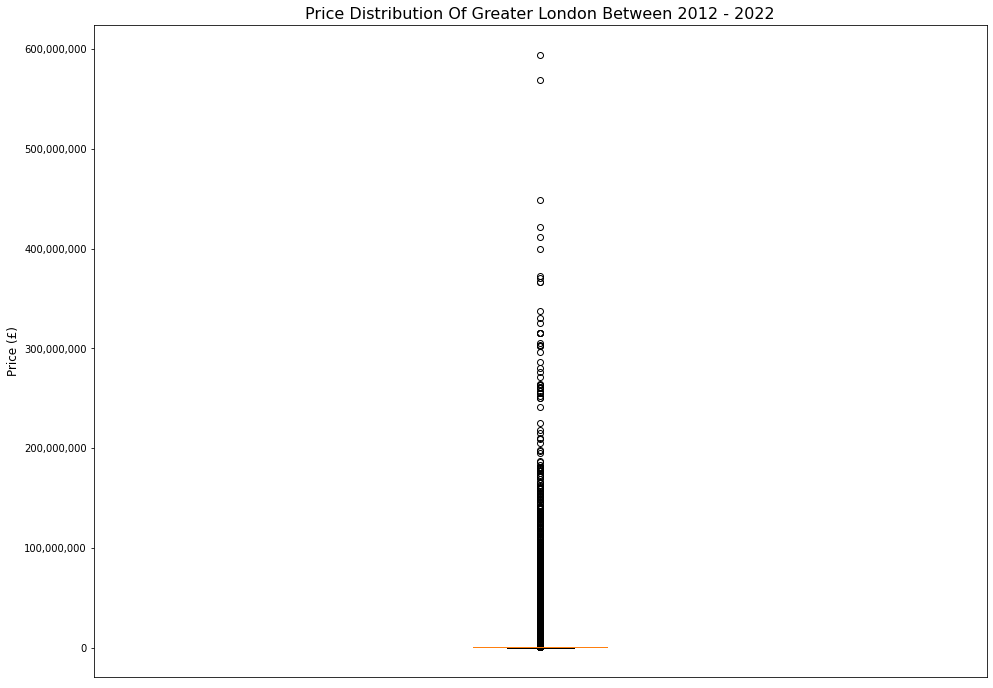

In [26]:
county = str(input('Please insert the county name: ')).upper()
county_price_distribution(df, county)

<b>Q3</b> = 625k: 75% of the price paid are less than or equal to £625k <br>
<b>MEDIAN</b> = 420k : the media price paid is 420k <br>
<b>Q1</b> = 295k : 25% of the price paid are within less than or equal to £295k<br>
<b>INTERQUARTILE RANGE</b> = 330k : 50% of the price paid are within the £330k range <br>

#### What was the trend of the average price paid in Greater London between 2012 - 2022?

In [135]:
def county_average_price(df, county):
    """
    Visualises the mean and median price paid for the given county in the dataframe from 2012 - 2022
    
    Parameters:
    df : string - the dataframe 
    county : string - in capital letters for the specific location
    
    """
    
    df = df[df.county == county]
    yearly_median = df.groupby('year').median()['price'].reset_index()
    yearly_mean = df.groupby('year').mean()['price'].reset_index()
    
    plt.figure(figsize=(12,8))
    plt.plot(yearly_mean['year'], yearly_mean['price'], marker='.', color='#c2591d', label='Mean')
    plt.plot(yearly_median['year'], yearly_median['price'], marker='.', color='blue', label='Median')
    plt.ylim(0, 900000)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('£{x:,.0f}'))
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.title('The Average and Median price paid for \n{} between 2012 - 2022'.format(county).title(), size=20,
             fontweight='bold')
    plt.xlabel('Year', loc='center', size=18)
    plt.ylabel('Price (£)', size=18)
    plt.legend(fontsize=16)
    
    return plt.show()

Please insert the county name: GREATER LONDON


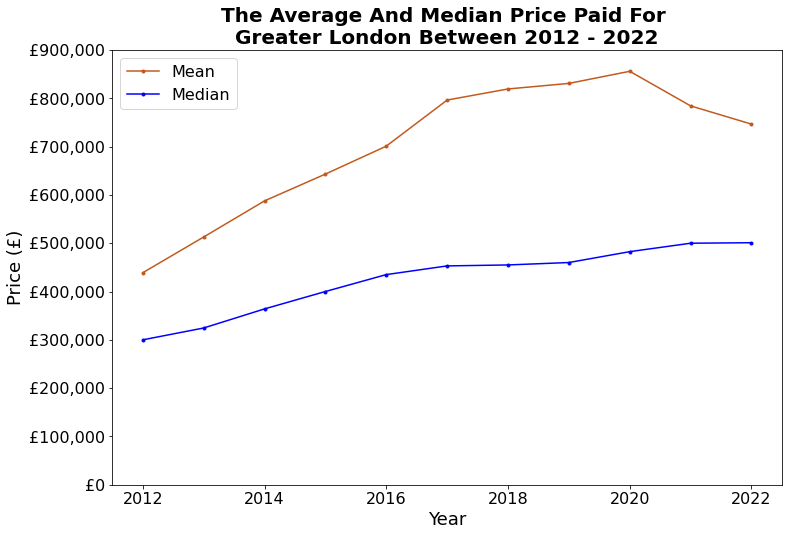

In [136]:
county = str(input('Please insert the county name: ')).upper()
county_average_price(df, county)

In [48]:
# Table of mean and median prices
yearly_mean_gl = greater_london.groupby('year').mean()['price'].round().reset_index()
yearly_median_gl = greater_london.groupby('year').median()['price'].round().reset_index()
mean_median_gl = yearly_mean_greater_london.merge(yearly_median_gl, on='year', how='left')
mean_median_gl.columns = ['year', 'mean_price', 'median_price']

In [49]:
mean_median_gl

,year,mean_price,median_price
0,2012,438853.0,300000.0
1,2013,512816.0,324500.0
2,2014,587535.0,364000.0
3,2015,643037.0,399995.0
4,2016,700824.0,435000.0
5,2017,796255.0,453000.0
6,2018,819191.0,455000.0
7,2019,830706.0,460000.0
8,2020,855750.0,482500.0
9,2021,784166.0,499950.0


In [57]:
pct_change_median = mean_median_gl.median_price.pct_change()
pct_change_median = pd.merge(mean_median_gl, pct_change_median, left_index=True, right_index=True)
pct_change_median.columns = ['year', 'mean_price', 'median_price', 'median_pct_change']
pct_change_median

,year,mean_price,median_price,median_pct_change
0,2012,438853.0,300000.0,NaN
1,2013,512816.0,324500.0,0.081667
2,2014,587535.0,364000.0,0.121726
3,2015,643037.0,399995.0,0.098887
4,2016,700824.0,435000.0,0.087514
5,2017,796255.0,453000.0,0.041379
6,2018,819191.0,455000.0,0.004415
7,2019,830706.0,460000.0,0.010989
8,2020,855750.0,482500.0,0.048913
9,2021,784166.0,499950.0,0.036166


In [58]:
# MEAN OR AVERAGE PCT CHANGE?

#### What is the trend in total number of sales for each property type for Greater London between 2012 - 2022?

In [31]:
greater_london['type'].value_counts()

F    596539
T    296246
S    152642
D     51746
O     48763
Name: type, dtype: int64

In [139]:
def county_type_sales(df, county):
    """
    Plots the total number of sales per each property type for the given county.
    
    Parameters:
    df : string - the dataframe
    county : string - the county for which the plot is for
    """
    df = df[df.county == county]
    values = df['type'].value_counts().keys().tolist()
    counts = df['type'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values, counts, color=('#2b540d', 'grey', 'grey', 'grey', 'grey'),
                  zorder=3)
    plt.grid(zorder=0)
    plt.xticks(['F','T','S','D','O'],
               ['Flats/Maisonettes', 'Terraced', 'Semi-Detached', 'Detached', 'Other'], 
               size=16)
    plt.yticks(size=16)
    plt.ylim(0, 650000)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('Total number of sales for each property type for \n {} between 2012 - 2022'.format(county).title(),
              size=20, fontweight='bold')
    plt.xlabel('Property Type', loc='center',size=18)
    plt.ylabel('Number of Sales',size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

Please insert the county name: GREATER LONDON


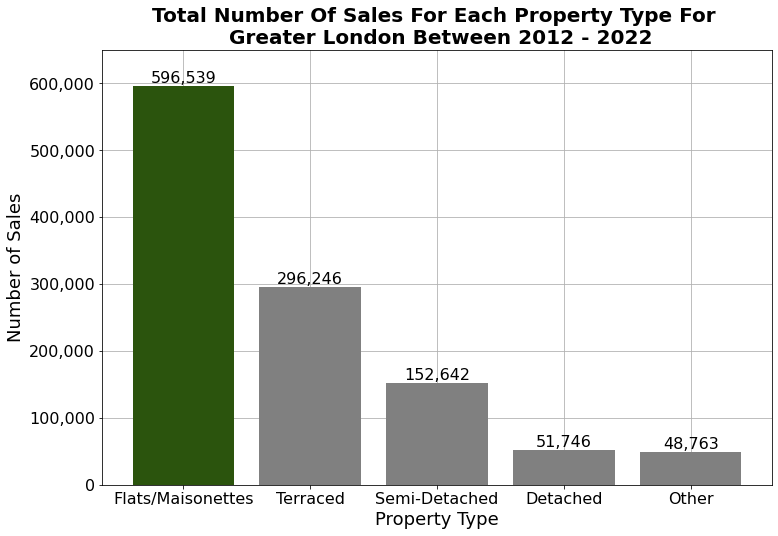

In [140]:
county = str(input('Please insert the county name: ')).upper()
county_type_sales(df, county)

#### What was the preferred property age?

In [112]:
greater_london['new_build'].value_counts()

N    1011434
Y     134502
Name: new_build, dtype: int64

In [131]:
def county_age_sales(df,county):
    """plots the most popular age of the property for the given country"""
    df = df[df.county == county]
    values = df['new_build'].value_counts().keys().tolist()
    counts = df['new_build'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values, counts, color=('#2b540d','grey'))
    plt.xticks(['N','Y'], ['Established Residential Building', 'New Build Property'], size=16)
    plt.yticks(size=16)
    plt.ylim(0, 1200000)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('The most popular property age for \n {} between 2012 - 2022'.format(county).title(), size=20,
             fontweight='bold')
    plt.xlabel('Property Age', loc='center', size=16)
    plt.ylabel('Number of Sales', size=16)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

Please insert the county name: GREATER LONDON


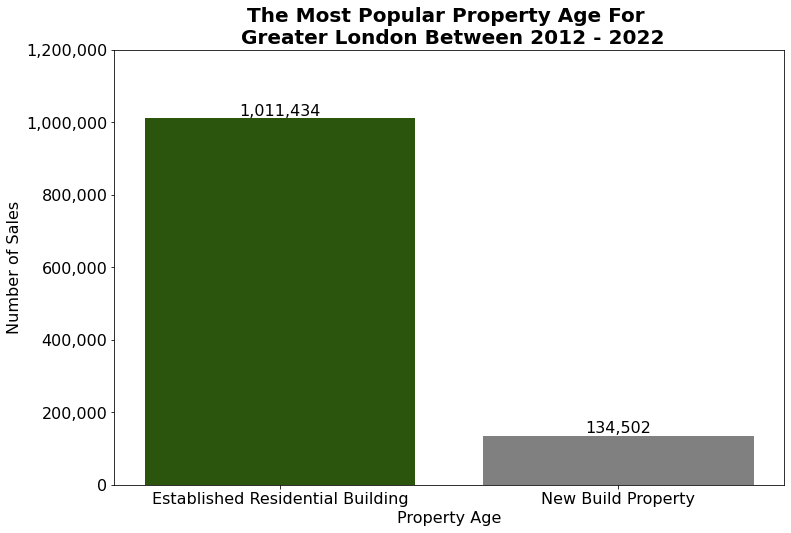

In [132]:
county = str(input('Please insert the county name: ')).upper()
county_age_sales(df, county)

####  What was the preferred type of tenure?

In [38]:
greater_london['duration'].value_counts()

L    628549
F    517387
Name: duration, dtype: int64

In [95]:
def county_duration_sales(df,county):
    df = df[df.county == county]
    values = greater_london['duration'].value_counts().keys().tolist()
    counts = greater_london['duration'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values, counts, color=('#2b540d','grey'))
    plt.xticks(['L','F'], ['Leasehold \n(>7 Years)', 'Freehold'], size=16)
    plt.yticks(size=16)
    plt.ylim(0, 700000)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('The most popular type of property tenure for \n{} between 2012 - 2022'.format(county).title(),
              size=20, fontweight='bold')
    plt.xlabel('Tenure', loc='center', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

Please insert the county name: GREATER LONDON


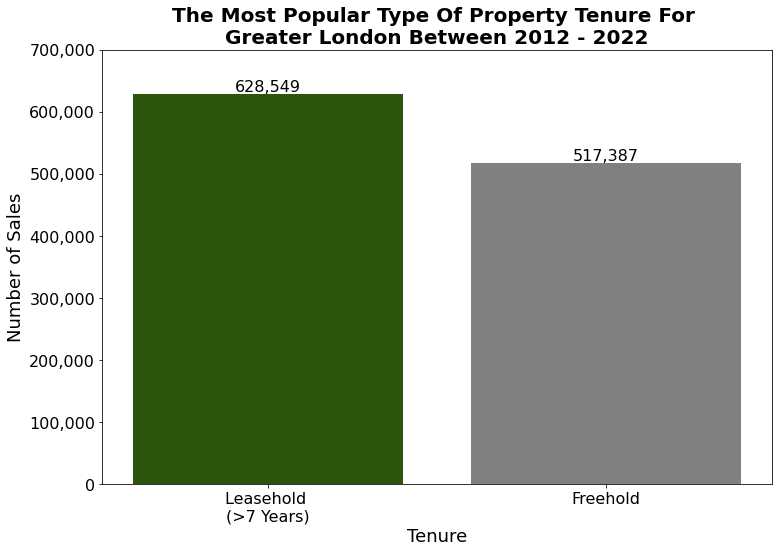

In [96]:
county = str(input('Please insert the county name: ')).upper()
county_duration_sales(df, county)

#### What was the preferred tenure of the most popular type of building sold in Greater London?

In [86]:
# come back to this

#### What was the most common of Price Paid Transaction?

In [42]:
greater_london['ppd_category'].value_counts()

A    990124
B    155812
Name: ppd_category, dtype: int64

In [103]:
def ppd_cat_sales(df,county):
    df = df[df.county == county]
    values = df['ppd_category'].value_counts().keys().tolist()
    counts = df['ppd_category'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values, counts, color=('#2b540d','grey'))
    plt.xticks(['A','B'], ['Standard Price Paid Entry \n', 'Additional Price Paid Entry'], size=16)
    plt.yticks(size=16)
    plt.ylim(0, 1200000)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('The most common price paid transaction for \n{} between 2012 - 2022'.format(county).title(),
             size=20, fontweight='bold')
    plt.xlabel('Price Paid Category', loc='center', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

Indicates the type of Price Paid transaction.
A = Standard Price Paid entry, includes single residential property sold for value.
B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage), transfers to non-private individuals and sales where the property type is classed as ‘Other’.
Note that category B does not separately identify the transaction types stated. HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2

Please insert the county name: GREATER LONDON


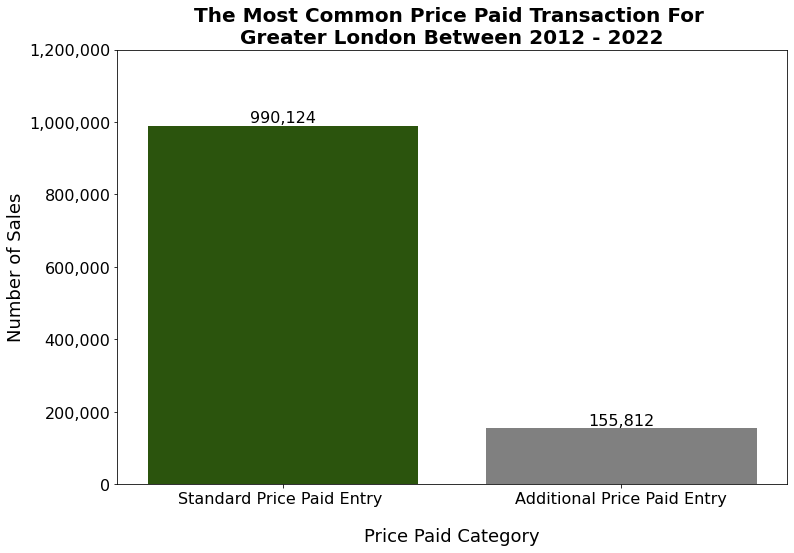

In [104]:
county = str(input('Please insert the county name: ')).upper()
ppd_cat_sales(df, county)

### 1.3 Analysis on the full dataframe

#### Top 5 performing counties which sold the most properties between 2012 - 2022

In [45]:
top5_county = df['county'].value_counts()
top5_county[0:5]

GREATER LONDON        1145936
GREATER MANCHESTER     430767
WEST MIDLANDS          367426
WEST YORKSHIRE         363748
KENT                   285357
Name: county, dtype: int64

In [115]:
def top_5_county(df):
    values = df['county'].value_counts().keys().tolist()
    counts = df['county'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values[0:5], counts[0:5], color=('#2b540d','grey','grey','grey','grey'))
    plt.xticks(rotation=45, size=16)
    plt.yticks(size=16)
    plt.ylim(0, 1300000)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('Top 5 performing counties \n which sold the most properties between 2012 - 2022',
             size=20, fontweight='bold')
    plt.xlabel('County', loc='center', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

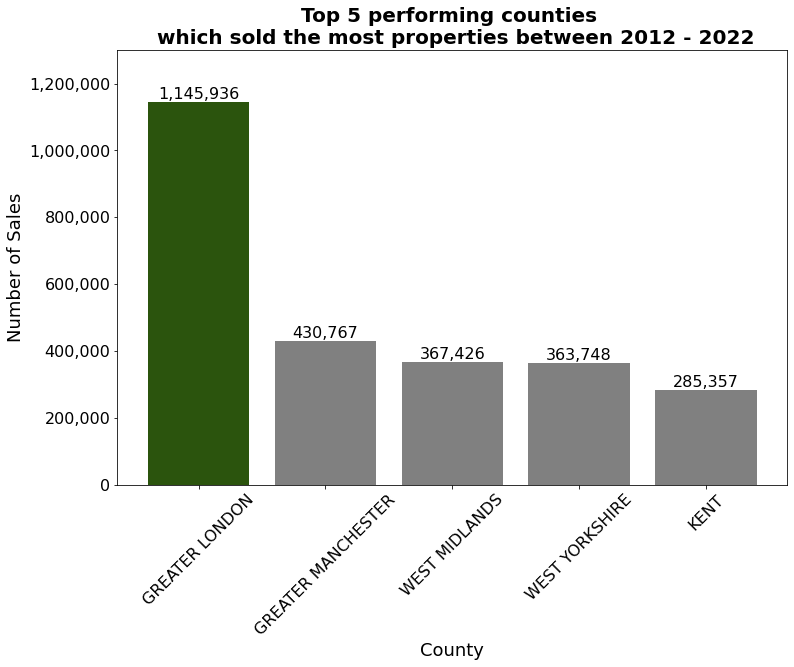

In [116]:
top_5_county(df)

#### Top 5 performing town and cities which sold the most properties between 2012 - 2022

In [117]:
top5_town_city = df['town_city'].value_counts()
top5_town_city[0:5]

LONDON        688882
MANCHESTER    157661
BRISTOL       152721
BIRMINGHAM    138154
NOTTINGHAM    129664
Name: town_city, dtype: int64

In [169]:
def top_5_town_city(df):
    values = df['town_city'].value_counts().keys().tolist()
    counts = df['town_city'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values[0:5], counts[0:5], color=('#2b540d','grey','grey','grey','grey'))
    plt.xticks(rotation=45, size=16)
    plt.yticks(size=16)
    plt.ylim(0, 1200000)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('Top 5 performing town and cities \n which sold the most properties between 2012 - 2022',
             size=20, fontweight='bold')
    plt.xlabel('Towns and Cities', loc='center', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

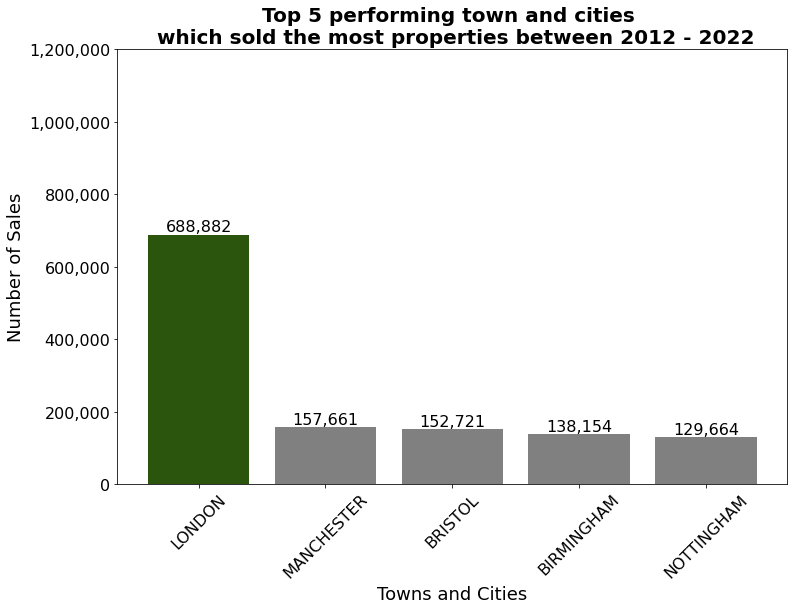

In [170]:
top_5_town_city(df)

#### What is the distribution of the England and Wales between 2012 and 2022?

In [51]:
df.describe()

,price,year,month
count,9.661539e+06,9.661539e+06,9.661539e+06
mean,3.229216e+05,2.016803e+03,6.688112e+00
std,1.350370e+06,2.822935e+00,3.422038e+00
min,1.000000e+00,2.012000e+03,1.000000e+00
25%,1.400000e+05,2.014000e+03,4.000000e+00
50%,2.199950e+05,2.017000e+03,7.000000e+00
75%,3.400000e+05,2.019000e+03,1.000000e+01
max,5.943000e+08,2.022000e+03,1.200000e+01


In [133]:
# Need to separate for England and Wales

def country_price_distribution(df):
    """
    Visulaises an interactive boxplot for the price distribuition of the dataset
    
    Parameters:
    df : string - the dataframe 
    """
    price_distribution = df['price']
    plt.figure(figsize =(12,8))
    plt.boxplot(price_distribution)
    plt.xticks([])
    plt.yticks(size=16)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('£{x:,.0f}'))
    plt.ylabel('Price (£)', size=18)
    plt.title('Distribution of price paid for properties in \n England and Wales between 2012-2022',
             size=20, fontweight='bold')
    return plt.show()

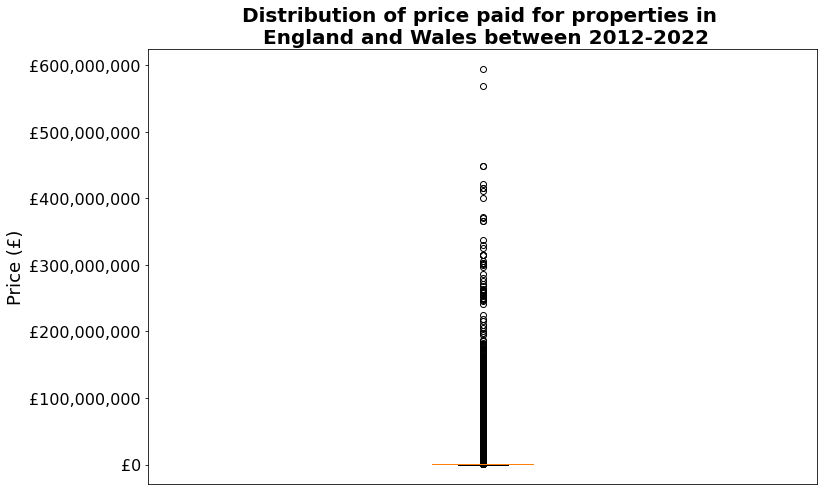

In [134]:
country_price_distribution(df)

<b>Q3</b> = xxxxx: 75% of the price paid are less than or equal to £xxxxx <br>
<b>MEDIAN</b> = xxxxx : the media price paid is xxxxx <br>
<b>Q1</b> = xxxxx : 25% of the price paid are within less than or equal to £xxxxx<br>
<b>INTERQUARTILE RANGE</b> = xxxxxx : 50% of the price paid are within the £xxxxx range <br>

#### What is the trend of the average price paid for a property in England and Wales between 2012 - 2022?

In [208]:
def country_average_price(df):
    """
    Visualises the mean and median price paid for England and Wales from 2012 - 2022
    
    Parameters:
    df : string - the dataframe 
    county : string - in capital letters for the specific location
    
    """
    
    df = df[df.county == county]
    yearly_median = df.groupby('year').median()['price'].reset_index()
    yearly_mean = df.groupby('year').mean()['price'].reset_index()
    
    plt.figure(figsize=(12,8))
    plt.plot(yearly_mean['year'], yearly_mean['price'], marker='.', color='orange', label='Mean')
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('£{x:,.0f}'))
    plt.plot(yearly_median['year'], yearly_median['price'], marker='.', color='blue', label='Median')
    plt.ylim(0, 900000)
    plt.title('Mean and Median price paid for \nEngland and Wales between 2012 - 2022'.title(),
             size=20, fontweight='bold')
    plt.xlabel('Year', loc='center', size=18)
    plt.ylabel('Price in GBP', size=18)
    plt.legend(fontsize=16)
    
    return plt.show()

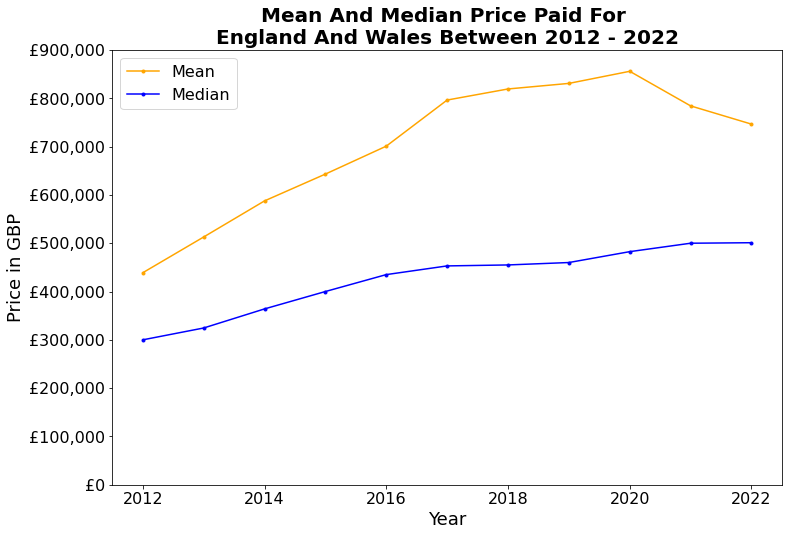

In [209]:
country_average_price(df)

In [153]:
# Need to separate lines for England and Wales
# Need to update this

def country_median_price(df):
    """
    Visualises the median price paid for the given dataframe (England and Wales) from 2012 -2022
    
    Parameters:
    df : string - the dataframe to analyse the median
    
    """
    yearly_median = df.groupby('year').median()['price'].reset_index()
    plt.figure(figsize=(12,8))
    plt.plot(yearly_median['year'], yearly_median['price'], marker='.')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('£{x:,.0f}'))
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.ylim(0, 550000)
    plt.title('Median Price Paid for \n England and Wales between 2012 - 2022',
             size=20, fontweight='bold')
    plt.xlabel('Year', loc='center', size=18)
    plt.ylabel('Price', size=18)
    plt.show()

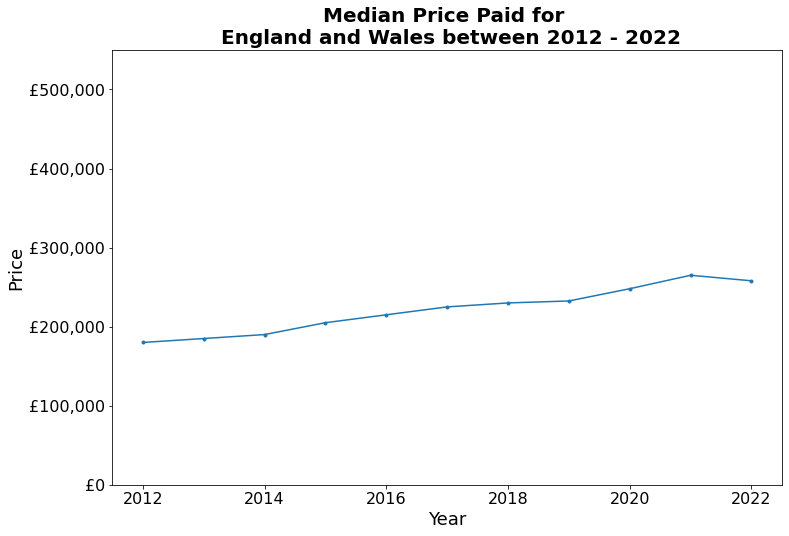

In [154]:
country_median_price(df)

Using median as the average, since median is less susceptible to the outlieres that exists in the data.

#### What's the total number of sales per property type of England and Wales?

In [171]:
def country_type_sales(df):
    """
    Plots the total number of sales per each property type for the given county.
    
    Parameters:
    df : string - the dataframe
    county : string - the county for which the plot is for
    """
    values = df['type'].value_counts().keys().tolist()
    counts = df['type'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values, counts, color=('#2b540d','grey','grey','grey','grey'))
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(['F','T','S','D','O'],
               ['Flats/Maisonettes', 'Terraced', 'Semi-Detached', 'Detached', 'Other'],
              size=16)
    plt.yticks(size=16)
    plt.ylim(0, 3000000)
    plt.title('Total number of sales for each property type for \n England and Wales between 2012 - 2022',
             size=20, fontweight='bold')
    plt.xlabel('Property Type', loc='center', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

##### SHOULD THIS BE TOWN_CITY INSTEAD OF COUNTY?

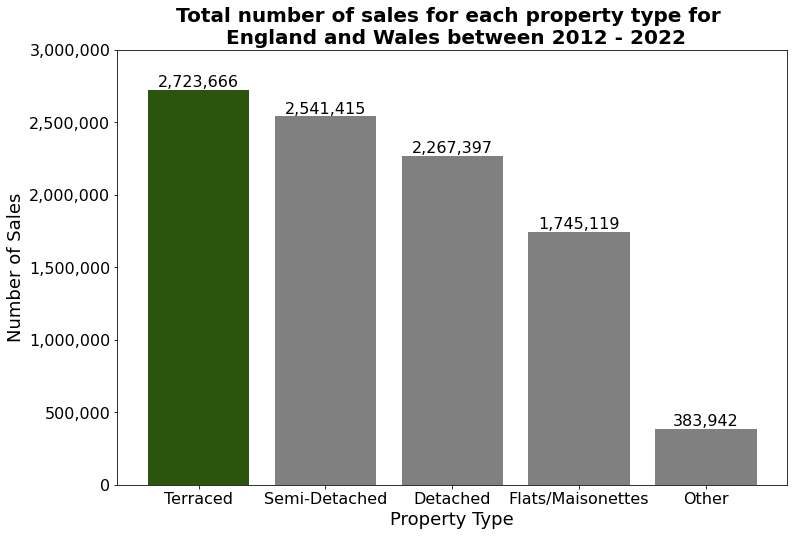

In [172]:
country_type_sales(df)

#### What was the preferred property age for England and Wales?

In [60]:
df['new_build'].value_counts()

N    8704854
Y     956685
Name: new_build, dtype: int64

In [182]:
def country_age_sales(df):
    """plots the most popular age of the property for the given country"""
    df = df[df.county == county]
    values = df['new_build'].value_counts().keys().tolist()
    counts = df['new_build'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values, counts, color=('#2b540d','grey'))
    plt.xticks(['N','Y'], ['Established Residential Building', 'New Build Property'], size=16)
    plt.yticks(size=16)
    plt.ylim(0, 1200000)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('The most popular property age for \n England and Wales between 2012 - 2022'.title(),
             size=20, fontweight='bold')
    plt.xlabel('Property Age', loc='center', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

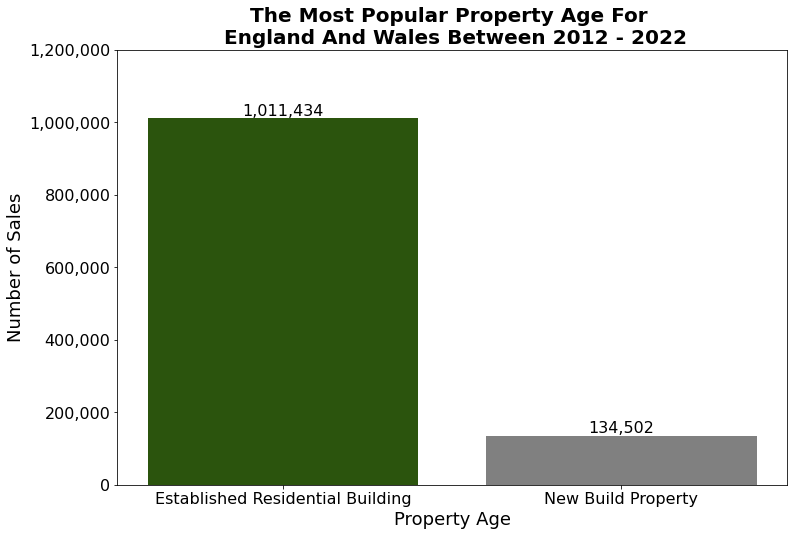

In [183]:
country_age_sales(df)

#### What was the preferred type of tenure?

In [190]:
def country_duration_sales(df):
    df = df[df.county == county]
    values = greater_london['duration'].value_counts().keys().tolist()
    counts = greater_london['duration'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values, counts, color=('#2b540d','grey'))
    plt.xticks(['L','F'], ['Leasehold \n(>7 Years)', 'Freehold'], size=16)
    plt.yticks(size=16)
    plt.ylim(0, 700000)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title('The most popular type of property tenure for \n England and Wales between 2012 - 2022.'.title(),
             size=20, fontweight='bold')
    plt.xlabel('Tenure', loc='center', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

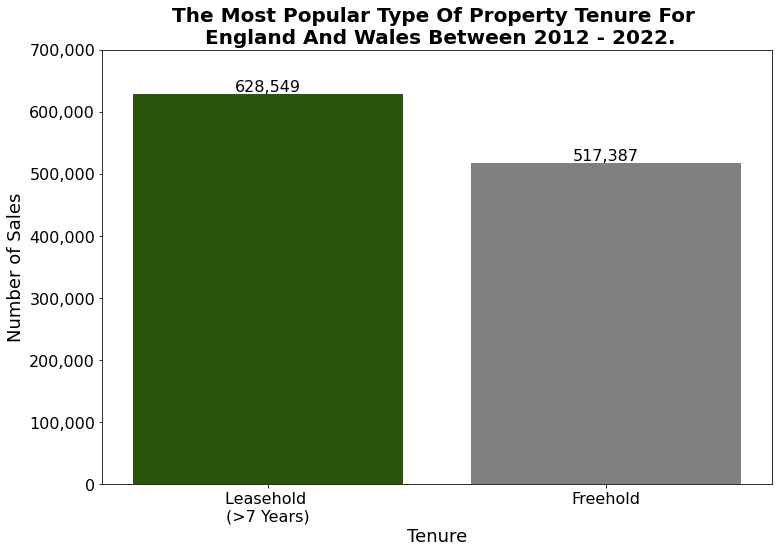

In [191]:
country_duration_sales(df)

#### What is the most common price paid transaction?

In [67]:
df['ppd_category'].value_counts()

A    8606811
B    1054728
Name: ppd_category, dtype: int64

In [196]:
def country_ppd_cat_sales(df):
    df = df[df.county == county]
    values = df['ppd_category'].value_counts().keys().tolist()
    counts = df['ppd_category'].value_counts().tolist()
    
    plt.figure(figsize=(12,8))
    plot = plt.bar(values, counts, color=('#2b540d','grey'))
    plt.xticks(['A','B'], ['Standard Price Paid Entry \n', 'Additional Price Paid Entry'],
              size=16)
    plt.yticks(size=16)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.ylim(0, 1200000)
    plt.title('The most common price paid transaction for \n England and Wales between 2012 - 2022.'.title(),
             size=20, fontweight='bold')
    plt.xlabel('Price Paid Category', loc='center', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    # Display bar values
    plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])
    
    return plt.show()

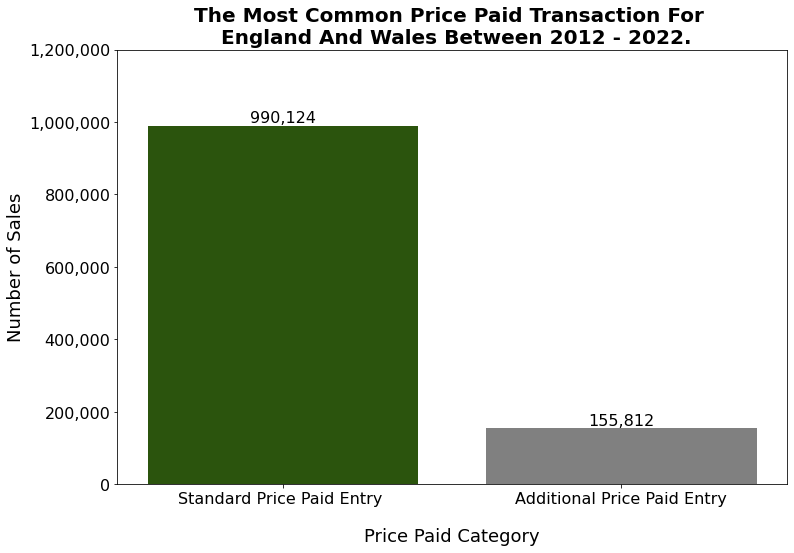

In [197]:
country_ppd_cat_sales(df)

#### Total monthly property sales between 2012 - 2022

In [370]:
# Total monthly sales for between 2012 - 2022
def all_total_monthly_sales():
    date_range = pd.date_range('2012-01-01', '2022-05-31', freq='1M')
    monthly_sales = df.groupby([df['year'], df['month']])['id'].count()
    total_monthly_sales = monthly_sales.reset_index()
    total_monthly_sales['date'] = date_range
    
    plt.figure(figsize=(12,8))
    plt.plot(total_monthly_sales['date'], total_monthly_sales['id'], color='dimgray')
    

    #### Styling the plot
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.title('Total monthly sales for \n England and Wales between 2012 - 2022', size=20, fontweight='bold')
    plt.xlabel('Date', size=18)
    plt.ylabel('Number of Sales', size=18)
    
    
    return plt.show()

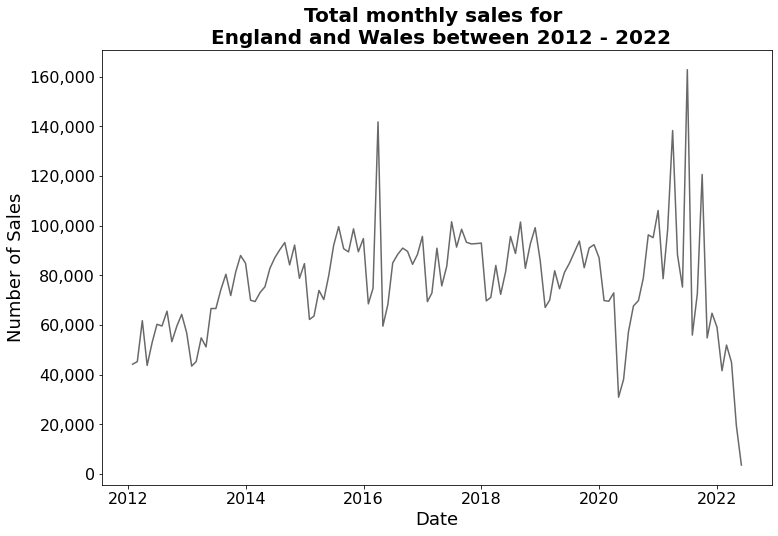

In [371]:
all_total_monthly_sales()

In [378]:
# Total monthly sales for between 2012 - 2022
def all_total_monthly_sales_highlight():
    date_range = pd.date_range('2012-01-01', '2022-05-31', freq='1M')
    monthly_sales = df.groupby([df['year'], df['month']])['id'].count()
    total_monthly_sales = monthly_sales.reset_index()
    total_monthly_sales['date'] = date_range
    
    plt.figure(figsize=(12,8))
    plt.plot(total_monthly_sales['date'], total_monthly_sales['id'], color='dimgray')
    
    # Highlight sub-periods
    plt.axvspan(date2num(datetime(2019,12,31)), date2num(datetime(2020,3,22)), 
           label="Pre-lockdown",color="orange", alpha=0.3)
    plt.axvspan(date2num(datetime(2020,3,23)), date2num(datetime(2020,5,10)), 
           label="Lockdown 1",color="red", alpha=0.3)
    plt.axvspan(date2num(datetime(2020,10,31)), date2num(datetime(2020,12,2)), 
           label="Lockdown 2",color="red", alpha=0.3)
    plt.axvspan(date2num(datetime(2021,1,6)), date2num(datetime(2021,3,7)), 
           label="Lockdown 3",color="red", alpha=0.3)
    plt.axvspan(date2num(datetime(2020,7,8)), date2num(datetime(2021,6,30)), 
           label="Stamp Duty Tax Holiday",color="lightskyblue", alpha=0.3)
    plt.axvline(pd.Timestamp('2021-03-08'), ls='--',color='green',
           label="Post-lockdown")
    

    #### Styling the plot
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.title('Total monthly sales for \n England and Wales between 2012 - 2022', size=20, fontweight='bold')
#     plt.xlabel('Date', size=18)
    plt.ylabel('Number of Sales', size=18)
    plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
    
    return plt.show()

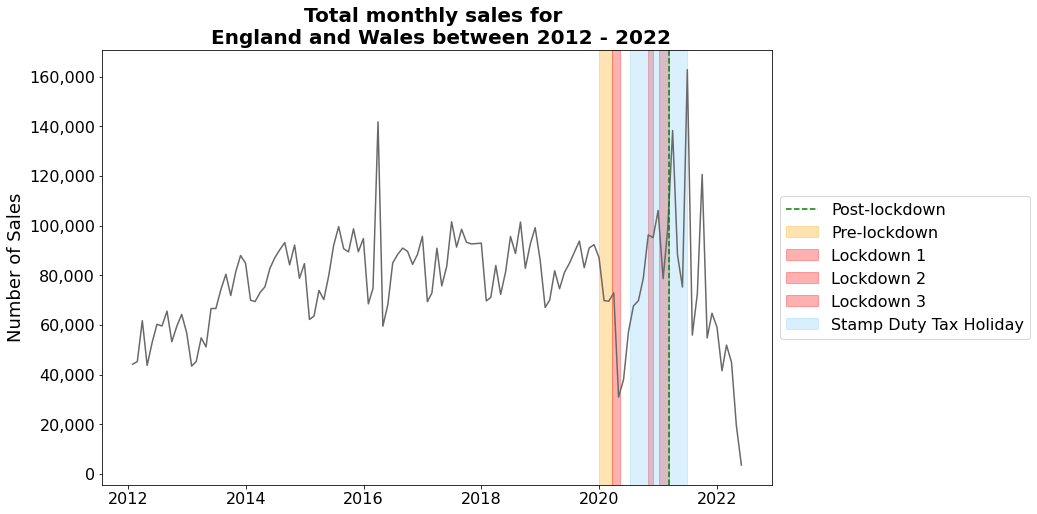

In [379]:
all_total_monthly_sales_highlight()

### 1.4 Further analysis during COVID-19
#### Sub-periods

* <b> 31st December 2019 - 25th March 2020:</b>
<br>Pre-lockdown, cluster of pneumonia in Wuhan, Hubei, China was reported and later a novel coronavirus was identified.

* <b>23rd March 2020 / 26th March 2020- 10th May 2020:</b>
<br>Lockdown 1, first lockdown announcement until the conditional plan for lifting / Lockdown legally come into force.

* <b>8th July 2020 - 30th June 2021:</b>
<br>Stamp Duty Land Tax (SDLT) holiday announced by the then Chancellor of Exchequer Rishi Sunak

* <b>1st July 2021 - 30th September 2021:</b>
<br>Stamp Duty Land Tax (SDLT) holiday

* <b>31st October 2020 / 5th November 2020 - 2nd December 2020:</b>
<br>Lockdown 2, Prime Minister announces a second lockdown / UK enters a second lockdown. This lockdown lasted just four weeks, however the UK enters a new tier system.

* <b>6th January 2021 - 7th March 2021:</b>
<br>Lockdown 3, The UK enters its third and final national lockdown.

* <b>8th March 2021:</b>
<br>Post-lockdown, relaxation of the restrictions. By this point the vaccination programme had been rolled out across the country giving the confidence to ‘keep life moving’, a slogan which was introduced on 21st July 2021.

REF: https://commonslibrary.parliament.uk/research-briefings/cbp-9068/

In [334]:
# COVID-19 Subperiods and key dates dataframes
# Whole period
covid = df[(df['date'] >= '2019-12-31') & (df['date'] <= '2022-05-31')]

# Pre-lockdown
pre_lockdown = covid[(covid['date'] >= '2019-12-31') & (covid['date'] <= '2020-03-25')]

# Lockdown 1
lockdown_1 = covid[(covid['date'] >= '2020-03-26') & (covid['date'] <= '2020-05-10')]

# Stamp Duty Land Tax Holiday
sdlt_holiday = covid[(covid['date'] >= '2020-07-08') & (covid['date'] <= '2021-06-30')]

# Lockdown 2 - 5th November -- as the official date
lockdown_2 = covid[(covid['date'] >= '2020-11-05') & (covid['date'] <= '2020-12-02')]

# Lockdown 3
lockdown_3 = covid[(covid['date'] >= '2021-01-06') & (covid['date'] <= '2021-03-07')]

# Post Lockdown -- for 'real time' code would have to be configured
post_lockdown = covid[(covid['date'] >= '2021-03-08') & (covid['date'] <= '2022-05-31')]

#### Total monthly sales during the COVID-19 sub-periods

In [374]:
def covid_total_monthly_sales():
    date_range = pd.date_range('2019-12-31', '2022-05-31', freq='1M')
    monthly_sales = covid.groupby([covid['year'], covid['month']])['id'].count()
    total_monthly_sales = monthly_sales.reset_index()
    total_monthly_sales['date'] = date_range
    
    plt.figure(figsize=(16,12))
    plt.plot(total_monthly_sales['date'], total_monthly_sales['id'], marker='o', color='dimgray')
    
    # Highlight sub-periods
    plt.axvspan(date2num(datetime(2019,12,31)), date2num(datetime(2020,3,22)), 
           label="Pre-lockdown",color="orange", alpha=0.3)
    plt.axvspan(date2num(datetime(2020,3,23)), date2num(datetime(2020,5,10)), 
           label="Lockdown 1",color="red", alpha=0.3)
    plt.axvspan(date2num(datetime(2020,10,31)), date2num(datetime(2020,12,2)), 
           label="Lockdown 2",color="red", alpha=0.3)
    plt.axvspan(date2num(datetime(2021,1,6)), date2num(datetime(2021,3,7)), 
           label="Lockdown 3",color="red", alpha=0.3)
    plt.axvspan(date2num(datetime(2020,7,8)), date2num(datetime(2021,6,30)), 
           label="Stamp Duty Tax Holiday",color="lightskyblue", alpha=0.3)
    plt.axvline(pd.Timestamp('2021-03-08'), ls='--',color='green',
           label="Post-lockdown")
    
    # Need to put a comma in yticklabels

    
    #### Styling the plot
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.title('Total monthly sales for England and Wales during COVID-19', size=20, fontweight='bold')
    plt.xlabel('Date', size=18)
    plt.ylabel('Number of Sales', size=18)
    plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))

    
    
    return plt.show()

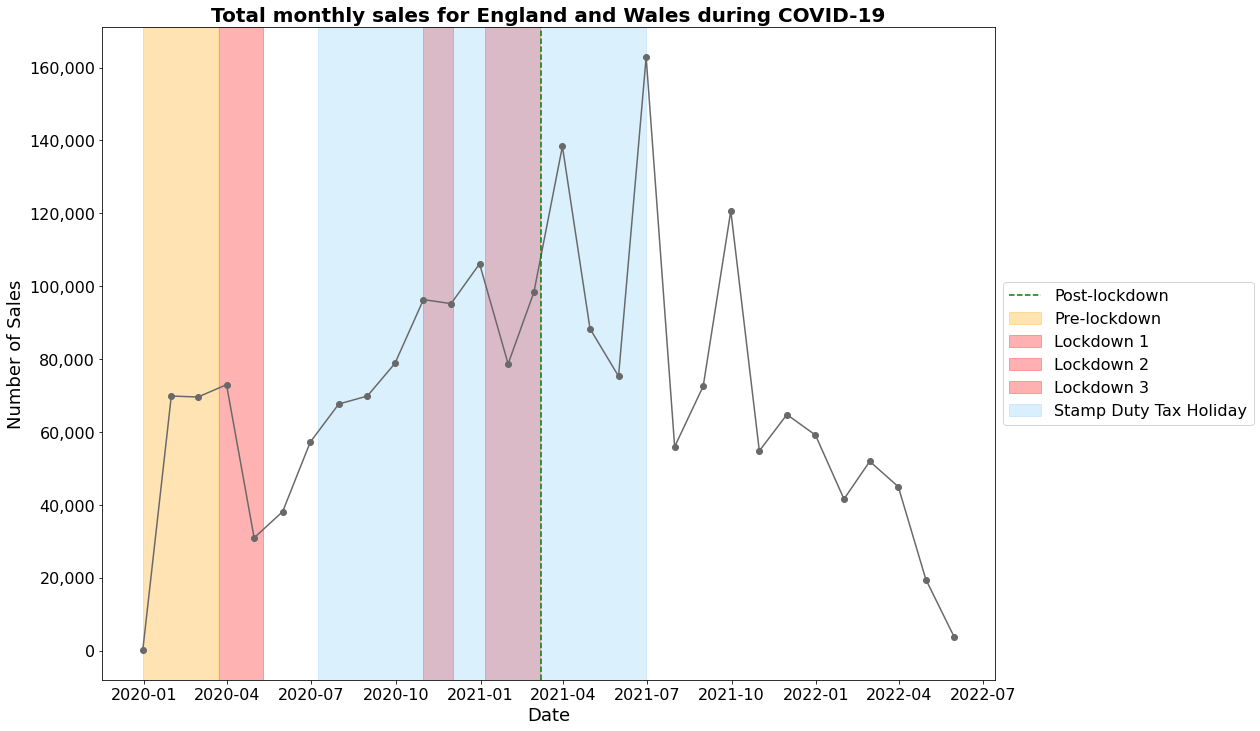

In [375]:
covid_total_monthly_sales()

In [ ]:
# Make a graph with all the total of each sub-period?

In [337]:
pre_lockdown.id.count()

193283

In [338]:
lockdown_1.id.count()

58611

In [339]:
lockdown_2.id.count()

93579

In [340]:
lockdown_3.id.count()

199514

In [341]:
post_lockdown.id.count()

1028200

#### Pre-Lockdown

In [ ]:
# Total number of sales
# Total number of sales per house type

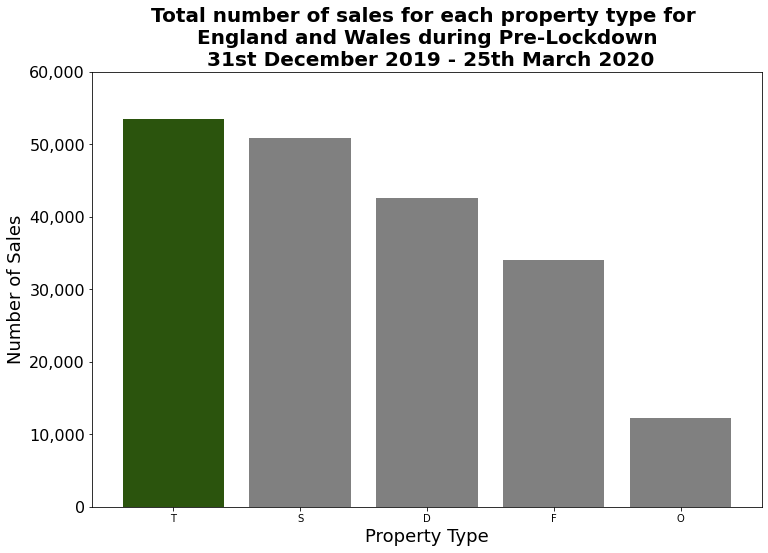

In [352]:
type_values = pre_lockdown['type'].value_counts().keys().tolist()
type_counts = pre_lockdown['type'].value_counts().tolist()


plt.figure(figsize=(12,8))
# plot = 
plt.bar(type_values, type_counts, color=('#2b540d','grey','grey','grey','grey'))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xticks(['F','T','S','D','O'], ['Flats/Maisonettes', 'Terraced', 'Semi-Detached', 'Detached', 'Other'],
#            size=16)
plt.yticks(size=16)
plt.ylim(0, 60000)
plt.title('Total number of sales for each property type for \n England and Wales during Pre-Lockdown \n 31st December 2019 - 25th March 2020',
          size=20, fontweight='bold')
plt.xlabel('Property Type', loc='center', size=18)
plt.ylabel('Number of Sales', size=18)
    
# Display bar values
# plt.bar_label(plot, size=16, labels=[f'{x:,.0f}' for x in plot.datavalues])

plt.show()

In [362]:
# LOOKOING AT THE INCREASE AND DECREASE OF THE 5 BIGGEST CITIES IN THE UK BETWEEN COVID PERIOD IN COMPARISON TO THE YEAR BEFORE?
# LOOK AT SALES IS COASTAL AREAS?

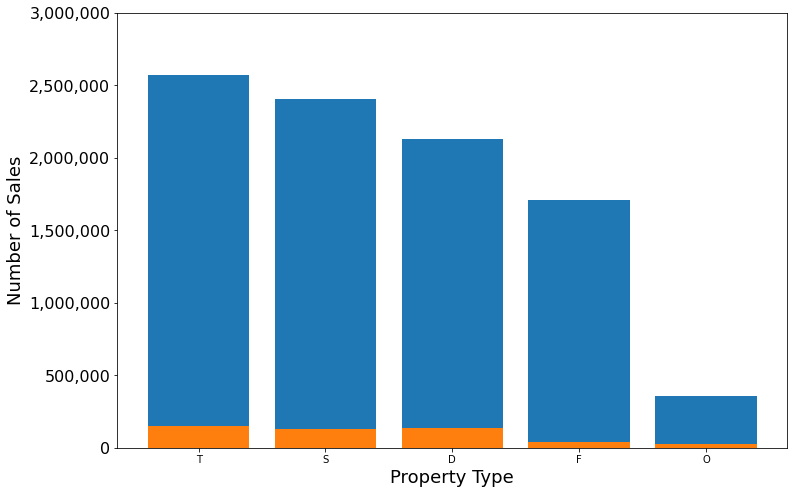

In [361]:
# Total number of property type for England and Wales

eng_values = england['type'].value_counts().keys().tolist()
eng_counts = england['type'].value_counts().tolist()
wales_values = wales['type'].value_counts().keys().tolist()
wales_counts = wales['type'].value_counts().tolist()


plt.figure(figsize=(12,8))
# plot = 
plt.bar(eng_values, eng_counts)
plt.bar(wales_values, wales_counts)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xticks(['F','T','S','D','O'], ['Flats/Maisonettes', 'Terraced', 'Semi-Detached', 'Detached', 'Other'],
#            size=16)
plt.yticks(size=16)
plt.ylim(0, 3000000)
# plt.title('Total number of sales for each property type for \n England and Wales during Pre-Lockdown \n 31st December 2019 - 25th March 2020',
#           size=20, fontweight='bold')
plt.xlabel('Property Type', loc='center', size=18)
plt.ylabel('Number of Sales', size=18)

plt.show()

#### Daily total sales during each sub-periods

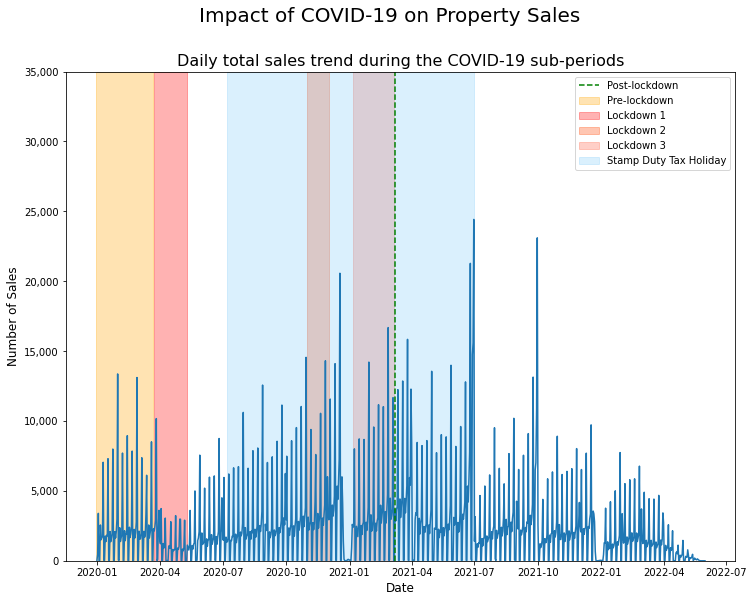

In [77]:
# Overview of the daily total sales trend in the COVID-19 subperiods
## Try plot monthly instead
daily_sales = covid.groupby('date')['id'].count()
plt.figure(figsize=(12,9))
plt.plot(daily_sales)

# Highlighting the subperiods
plt.axvspan(date2num(datetime(2019,12,31)), date2num(datetime(2020,3,22)), 
           label="Pre-lockdown",color="orange", alpha=0.3)
plt.axvspan(date2num(datetime(2020,3,23)), date2num(datetime(2020,5,10)), 
           label="Lockdown 1",color="red", alpha=0.3)
plt.axvspan(date2num(datetime(2020,10,31)), date2num(datetime(2020,12,2)), 
           label="Lockdown 2",color="orangered", alpha=0.3)
plt.axvspan(date2num(datetime(2021,1,6)), date2num(datetime(2021,3,7)), 
           label="Lockdown 3",color="tomato", alpha=0.3)
plt.axvspan(date2num(datetime(2020,7,8)), date2num(datetime(2021,6,30)), 
           label="Stamp Duty Tax Holiday",color="lightskyblue", alpha=0.3)
plt.axvline(pd.Timestamp('2021-03-08'), ls='--',color='green',
           label="Post-lockdown")

# Styling the plot
plt.ylim(0, 35000)
# plt.xlim()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle('Impact of COVID-19 on Property Sales', fontsize=20)
plt.title('Daily total sales trend during the COVID-19 sub-periods', size=16)
plt.legend()
plt.show()

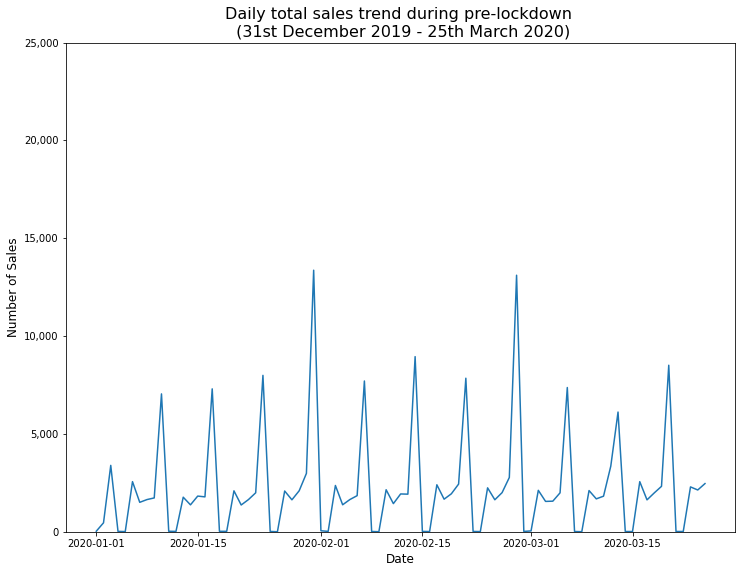

In [78]:
# Pre-lockdown daily total sales trend
pre_lockdown_daily_sales = pre_lockdown.groupby('date')['id'].count()
plt.figure(figsize=(12,9))
plt.plot(pre_lockdown_daily_sales)

# Styling the plot
plt.ylim(0, 25000)
# plt.xlim()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.suptitle('Impact of COVID-19 on Property Sales', fontsize=20)
plt.title('Daily total sales trend during pre-lockdown \n (31st December 2019 - 25th March 2020)', size=16)
# plt.legend()
plt.show()

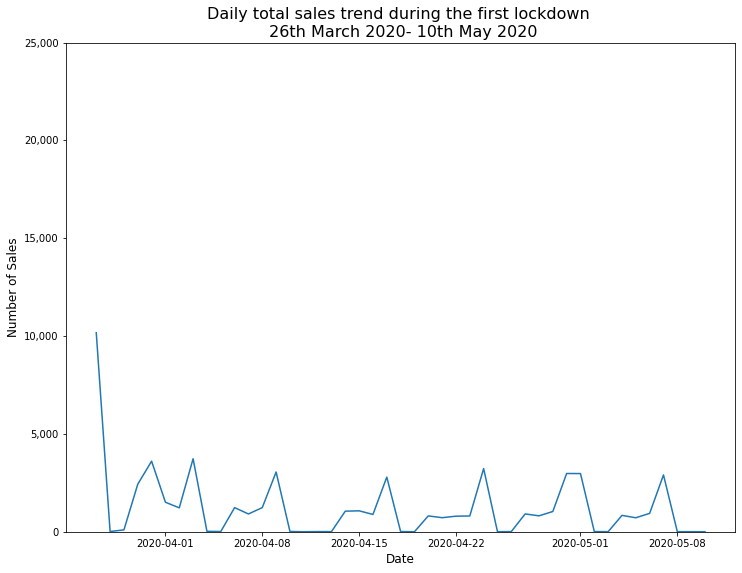

In [79]:
# Pre-lockdown daily total sales trend
lockdown_1_daily_sales = lockdown_1.groupby('date')['id'].count()
plt.figure(figsize=(12,9))
plt.plot(lockdown_1_daily_sales)

# Styling the plot
plt.ylim(0, 25000)
# plt.xlim()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.suptitle('Impact of COVID-19 on Property Sales', fontsize=20)
plt.title('Daily total sales trend during the first lockdown \n 26th March 2020- 10th May 2020', size=16)
# plt.legend()
plt.show()

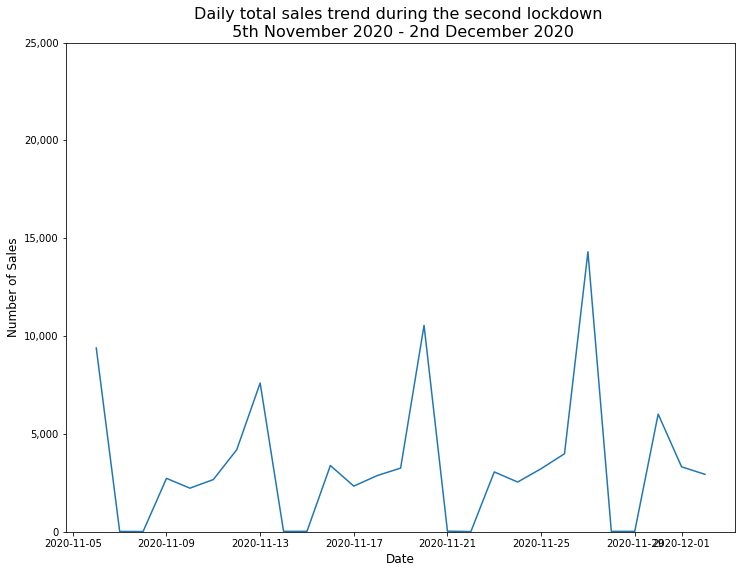

In [80]:
# Pre-lockdown daily total sales trend
lockdown_2_daily_sales = lockdown_2.groupby('date')['id'].count()
plt.figure(figsize=(12,9))
plt.plot(lockdown_2_daily_sales)

# Styling the plot
plt.ylim(0, 25000)
# plt.xlim()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.suptitle('Impact of COVID-19 on Property Sales', fontsize=20)
plt.title('Daily total sales trend during the second lockdown \n 5th November 2020 - 2nd December 2020', size=16)
# plt.legend()
plt.show()

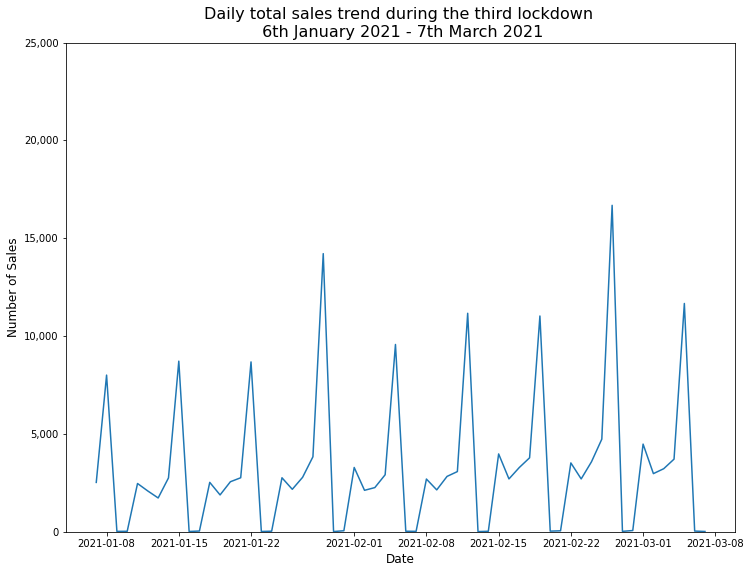

In [81]:
# Pre-lockdown daily total sales trend
lockdown_3_daily_sales = lockdown_3.groupby('date')['id'].count()
plt.figure(figsize=(12,9))
plt.plot(lockdown_3_daily_sales)

# Styling the plot
plt.ylim(0, 25000)
# plt.xlim()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.suptitle('Impact of COVID-19 on Property Sales', fontsize=20)
plt.title('Daily total sales trend during the third lockdown \n 6th January 2021 - 7th March 2021', size=16)
# plt.legend()
plt.show()

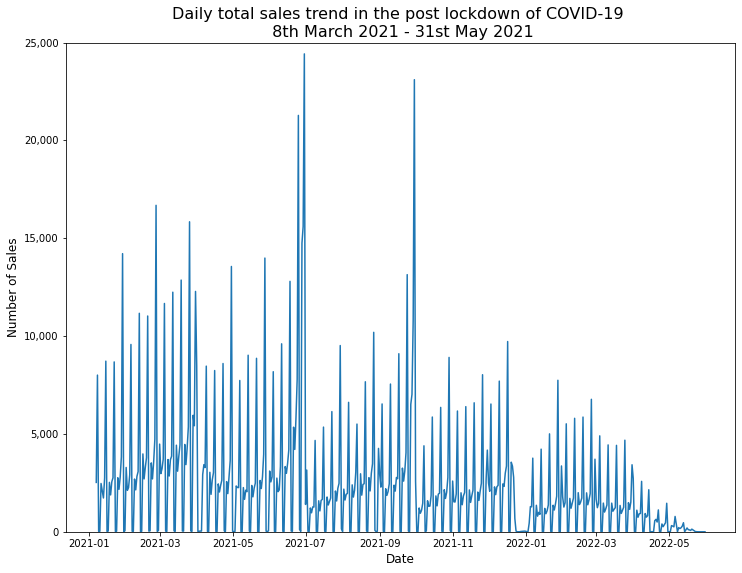

In [82]:
# Post-lockdown daily total sales trend
post_lockdown_daily_sales = post_lockdown.groupby('date')['id'].count()
plt.figure(figsize=(12,9))
plt.plot(post_lockdown_daily_sales)

# Styling the plot
plt.ylim(0, 25000)
# plt.xlim()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.suptitle('Impact of COVID-19 on Property Sales', fontsize=20)
plt.title('Daily total sales trend in the post lockdown of COVID-19 \n 8th March 2021 - 31st May 2021', size=16)
# plt.legend()
plt.show()

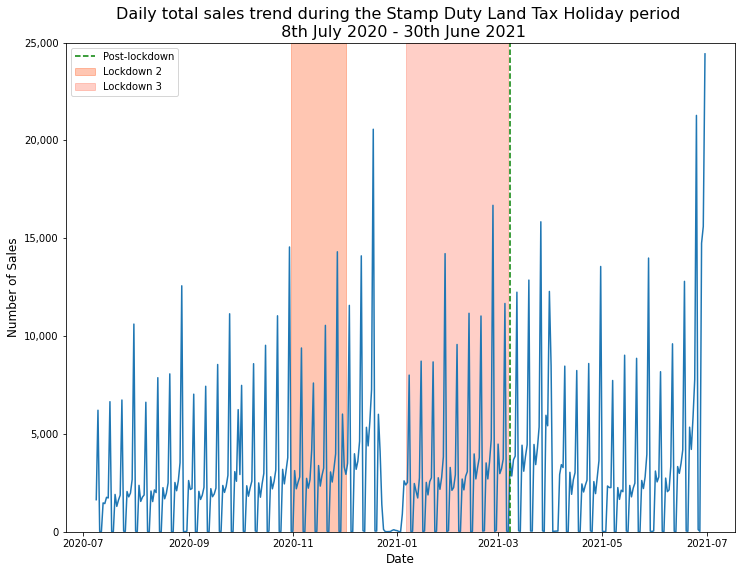

In [83]:
# Stamp Duty Land Tax Period - Daily total sales trend
sdlt_holiday_daily_sales = sdlt_holiday.groupby('date')['id'].count()
plt.figure(figsize=(12,9))
plt.plot(sdlt_holiday_daily_sales)

plt.axvspan(date2num(datetime(2020,10,31)), date2num(datetime(2020,12,2)), 
           label="Lockdown 2",color="orangered", alpha=0.3)
plt.axvspan(date2num(datetime(2021,1,6)), date2num(datetime(2021,3,7)), 
           label="Lockdown 3",color="tomato", alpha=0.3)
plt.axvline(pd.Timestamp('2021-03-08'), ls='--',color='green',
           label="Post-lockdown")

# Styling the plot
plt.ylim(0, 25000)
# plt.xlim()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.suptitle('Impact of COVID-19 on Property Sales', fontsize=20)
plt.title('Daily total sales trend during the Stamp Duty Land Tax Holiday period \n 8th July 2020 - 30th June 2021', size=16)
plt.legend()
plt.show()



In [84]:
# On average, there were up to 3198 recorded property sales per day during the SDLT holiday period.

In [85]:
sdlt_holiday_daily_sales.describe()

count      357.000000
mean      3198.184874
std       3910.757856
min          6.000000
25%         37.000000
50%       2335.000000
75%       3641.000000
max      24422.000000
Name: id, dtype: float64

In [86]:
df.id.count()

9661539

In [87]:
grouped_date = df.groupby('date')

In [88]:
grouped_date.id.count()

date
2012-01-01        6
2012-01-02       25
2012-01-03      529
2012-01-04     1254
2012-01-05     1326
2012-01-06     4492
2012-01-07       14
2012-01-08        3
2012-01-09     1415
2012-01-10     1005
2012-01-11     1053
2012-01-12     2437
2012-01-13     3078
2012-01-14       23
2012-01-15        6
2012-01-16     1891
2012-01-17      973
2012-01-18     1190
2012-01-19     1405
2012-01-20     5333
2012-01-21       18
2012-01-22        9
2012-01-23     1342
2012-01-24     1005
2012-01-25     1265
2012-01-26     1479
2012-01-27     6970
2012-01-28        5
2012-01-29       11
2012-01-30     1782
2012-01-31     2893
2012-02-01     1535
2012-02-02     1124
2012-02-03     4790
2012-02-04        5
2012-02-05        6
2012-02-06     1323
2012-02-07      863
2012-02-08     1146
2012-02-09     1225
2012-02-10     5587
2012-02-11        5
2012-02-12       11
2012-02-13     1340
2012-02-14     1258
2012-02-15     1285
2012-02-16     1352
2012-02-17     5035
2012-02-18        8
2012-02-19     

In [89]:
#### Yearly number of sales

In [90]:
yearly_sales =  df.groupby(df.date.dt.year)['id'].count()

In [91]:
yearly_sales

date
2012     667571
2013     809096
2014     981474
2015    1005214
2016    1035707
2017    1056260
2018    1025575
2019     996634
2020     852690
2021    1069715
2022     161603
Name: id, dtype: int64

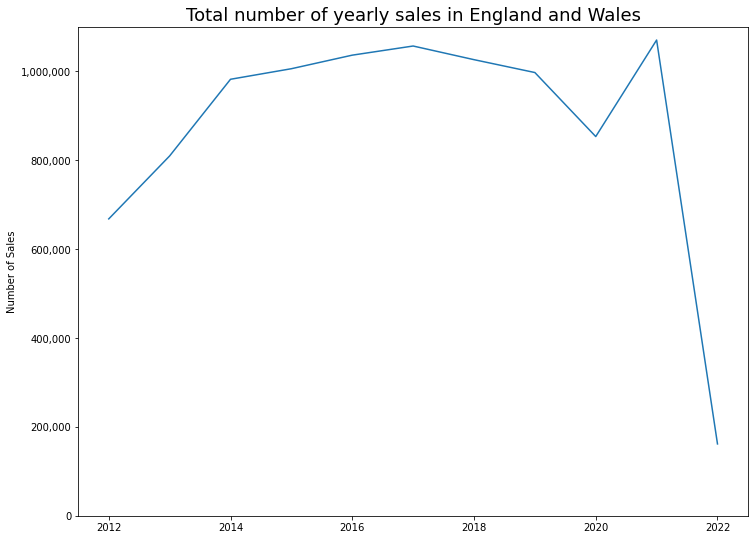

In [92]:
plt.figure(figsize=(12,9))
plt.plot(yearly_sales)
plt.ylim(0, 1100000)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Number of Sales')
plt.title('Total number of yearly sales in England and Wales', size=18)
plt.show()

In [93]:
yearly_sales

date
2012     667571
2013     809096
2014     981474
2015    1005214
2016    1035707
2017    1056260
2018    1025575
2019     996634
2020     852690
2021    1069715
2022     161603
Name: id, dtype: int64

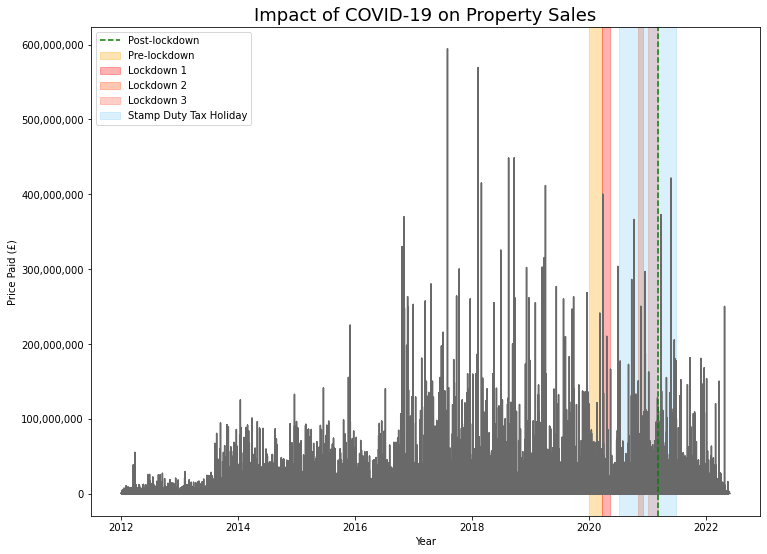

In [94]:
plt.figure(figsize=(12,9))
plt.plot(df['date'],df['price'], color='dimgray')
plt.axvspan(date2num(datetime(2019,12,31)), date2num(datetime(2020,3,22)), 
           label="Pre-lockdown",color="orange", alpha=0.3)
plt.axvspan(date2num(datetime(2020,3,23)), date2num(datetime(2020,5,10)), 
           label="Lockdown 1",color="red", alpha=0.3)
plt.axvspan(date2num(datetime(2020,10,31)), date2num(datetime(2020,12,2)), 
           label="Lockdown 2",color="orangered", alpha=0.3)
plt.axvspan(date2num(datetime(2021,1,6)), date2num(datetime(2021,3,7)), 
           label="Lockdown 3",color="tomato", alpha=0.3)
plt.axvspan(date2num(datetime(2020,7,8)), date2num(datetime(2021,6,30)), 
           label="Stamp Duty Tax Holiday",color="lightskyblue", alpha=0.3)
plt.axvline(pd.Timestamp('2021-03-08'), ls='--',color='green',
           label="Post-lockdown")
plt.legend()
plt.ylabel('Price Paid (£)')
plt.xlabel('Year')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Impact of COVID-19 on Property Sales', size=18)
plt.show()
# plt.savefig("highlight_time_range_in_time_series_plot_matplotlib.png")

In [95]:
# Perhaps need to reconsider choice of colour for inclusivity.
# Subplots to individually see the impact without being cluttered.
# start 2019
# reference the literature
# total value of sale != property price... median = proper
# more plots for COVID-19 2020 - present
# breakdown of the data for further insight

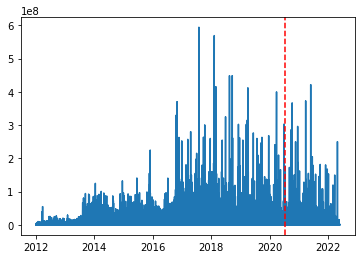

In [96]:
# Highlighting the Stamp Duty Land Tax (SDLT) holiday announced by the then Chancellor of Exchequer Rishi Sunak
plt.plot(df['date'], df['price'])
plt.axvline(pd.Timestamp('2020-07-08'), ls='--',color='red')
plt.show()

In [97]:
df.head()

,id,price,date,postcode,type,new_build,duration,primary_address,street,town_city,district,county,ppd_category,record,year,month,month_year
0,{A30B948C-3F24-412D-B2FE-0BDB90103AA7},165000,2012-01-01,S44 6EA,D,N,F,1,ELM CLOSE,CHESTERFIELD,BOLSOVER,DERBYSHIRE,A,A,2012,1,2012-01-01
1,{983EFF6B-0EDE-436F-B792-245561976CC7},242500,2012-01-01,PR3 3AX,D,N,L,26,COLLEGE CLOSE,PRESTON,RIBBLE VALLEY,LANCASHIRE,A,A,2012,1,2012-01-01
2,{71B72576-CBC5-4272-8604-46008F63B0B6},295000,2012-01-01,SY13 3DY,D,N,F,THE TIMBERS,NaN,WHITCHURCH,WREXHAM,WREXHAM,A,A,2012,1,2012-01-01
3,{17634145-0AA4-4C9B-9DF2-42AA5A6F17ED},87000,2012-01-01,B30 3BH,T,N,F,1734B,PERSHORE ROAD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A,2012,1,2012-01-01
4,{9F729E0A-5D87-4F58-8671-D8F743FA1D5A},125000,2012-01-01,TR13 9DA,T,N,F,7,UNITY ROAD,HELSTON,CORNWALL,CORNWALL,A,A,2012,1,2012-01-01


What is the median price paid for the last decade?

In [98]:
# # By year
# yearly_median = df.groupby('year').median()['price'].reset_index()

In [99]:
# # Visualisation

# plt.figure(figsize=(8,6))
# plt.plot(yearly_median['year'], yearly_median['price'])
# plt.show()

In [100]:
# # Monthly and yearly
# monthly_median = df.groupby('month_year').median()['price'].reset_index()

In [101]:
# # Visualisation
# plt.figure(figsize=(35,10))
# plt.plot(monthly_median['month_year'], monthly_median['price'])
# plt.xticks(rotation='vertical',
#            size=12)
# plt.show()

What is the annual price paid change % ?

In [102]:
# # Adding a percentage change column
# monthly_median['pct_change'] = df.pct_change

In [103]:
# monthly_median.head()

In [104]:
# # Visualisation
# plt.figure(figsize=(8,6))
# plt.plot(monthly_median['month_year'], monthly_median['pct_change'])
# plt.xticks(rotation='vertical',
#            size=8)
# plt.show()

In [105]:
##### COME BACK TO THIS

#### Property Type

In [106]:
# # Average House Price for England and Wales
# df.type.value_counts()[:].plot(kind='barh')

In [107]:
# property_type.shape

#### Sale Price

In [108]:
# df.price.describe()

In [109]:
# df.groupby('year').price.median().round()

In [110]:
df.groupby('year').price.mean().round()

year
2012    238467.0
2013    256914.0
2014    279304.0
2015    297044.0
2016    314149.0
2017    343891.0
2018    350325.0
2019    351157.0
2020    374634.0
2021    378927.0
2022    355688.0
Name: price, dtype: float64

### 1.4 Further analysis during COVID-19
#### Sub-periods

* <b> 31st December 2019 - 22nd March 2020:</b>
<br>Pre-lockdown, cluster of pneumonia in Wuhan, Hubei, China was reported and later a novel coronavirus was identified.

* <b>23rd March 2020 - 10th May 2020:</b>
<br>Lockdown 1, first lockdown announcement until the conditional plan for lifting.

* <b>8th July 2020 - 30th June 2021:</b>
<br>Stamp Duty Land Tax (SDLT) holiday announced by the then Chancellor of Exchequer Rishi Sunak

* <b>1st July 2021 - 30th September 2021:</b>
<br>Stamp Duty Land Tax (SDLT) holiday

* <b>31st October / 5th November 2020 - 2nd December 2020:</b>
<br>Lockdown 2, Prime Minister announces a second lockdown / UK enters a second lockdown. This lockdown lasted just four weeks, however the UK enters a new tier system.

* <b>6th January 2021 - 7th March 2021:</b>
<br>Lockdown 3, The UK enters its third and final national lockdown.

* <b>8th March 2021:</b>
<br>Post-lockdown, relaxation of the restrictions. By this point the vaccination programme had been rolled out across the country giving the confidence to ‘keep life moving’, a slogan which was introduced on 21st July 2021.


In [111]:
# Establish timeline and save it as a variable which can later be used to further analyse.

# pre_lockdown = [2019-12-31:2020-03-22]

# first_lockdown = [2020-03-23:2020-05-10]

# second_lockdown = [2020-11-5:2020-12-02]

# third_lockdown = [2021-01-06:2021-03-07]

# post_lockdown = [2021-03-08]

# sdlt_holiday = [2020-07-8:2021-06-30]

# sdlt_holidat_ex = [2021-07-01:2021-09-30]


In [112]:
# Sales in the Stamp Duty Holiday Period

In [113]:
# covid_df